# AGIRI transfer
Exploring applicability of models trained on CIFAKE for mixed images

In [1]:
import torch
import json

from classes import CI_LOADER, CIFAKE_CNN, get_files
from test import test_model, score_preds, test_thresh_size, visualise

with open('./config.json') as f:
    config = json.load(f)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c1017RegisterOperatorsD1Ev
  Referenced from: <EA7F9DF5-8854-31D8-89D4-BD566CAF4DEA> /Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/torchvision/image.so
  Expected in:     <03BFC270-EF54-36FC-B102-371F5164D3C9> /Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/torch/lib/libtorch_cpu.dylib'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [2]:
testfiles = get_files(config['AI_imgs_zhang'])['test']

In [3]:
len(testfiles)

12000

In [ ]:
testdata = CI_LOADER(testfiles, source='Zhang', batch_size=2)
# 18mins

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/PIL/Image.py:3186: DecompressionBombWarning: Image size (143040000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/PIL/Image.py:3186: DecompressionBombWarning: Image size (121554000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


In [5]:
len(testdata.batches)

4303

In [6]:
def quick_eval(model):
    # load model, test on test set
    gold, preds = test_model(model, testdata)
    eval = score_preds(gold, preds, verbose=True, per_class=True)
    return gold, preds, eval

#### Base model

In [7]:
# load model, test on test set
model = CIFAKE_CNN()
model.load_state_dict(torch.load(config['base_model']))
gold, preds, eval = quick_eval(model)

  0%|          | 0/4303 [00:00<?, ?it/s]


Performance (n=8606 test imgs, decision threshold=0.5)
Overall accuracy: 54.80%

               Fake      Real   Average
precision  0.425665  0.599669  0.512667
recall     0.309972  0.711931  0.510951
f1-score   0.358721  0.650996  0.504858


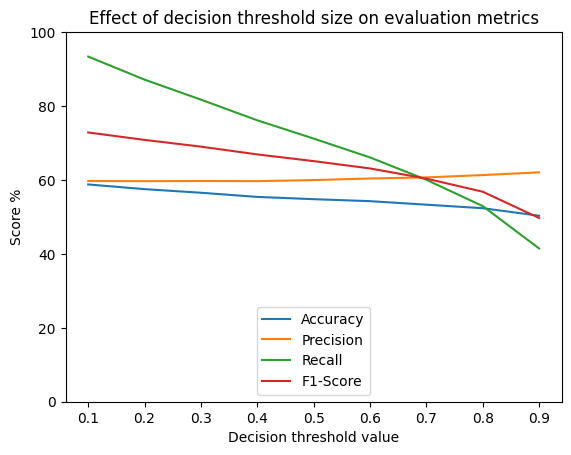

In [8]:
base_df = test_thresh_size(gold, preds)
visualise(base_df)

#### Attention model

In [9]:
# load model, test on test set
attn_model = CIFAKE_CNN(attn=True)
attn_model.load_state_dict(torch.load(config['attn_model']))
gold_attn, preds_attn, eval_attn = quick_eval(attn_model)

  0%|          | 0/4303 [00:00<?, ?it/s]


Performance (n=8606 test imgs, decision threshold=0.5)
Overall accuracy: 53.29%

               Fake      Real   Average
precision  0.396845  0.587708  0.492276
recall     0.279487  0.707418  0.493452
f1-score   0.327984  0.642030  0.485007


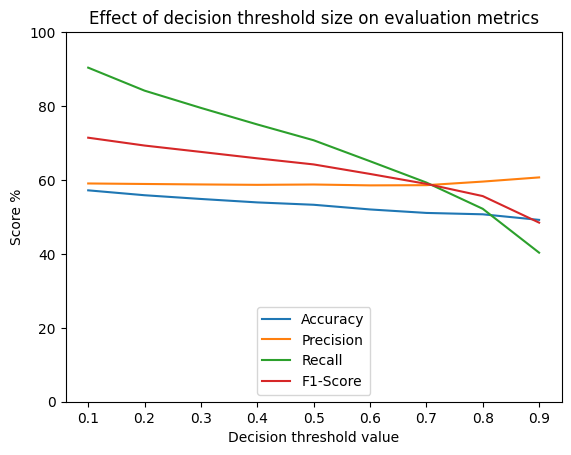

In [10]:
attn_df = test_thresh_size(gold_attn, preds_attn)
visualise(attn_df)

#### Mini model

In [11]:
# load model, test on test set
mini_model = CIFAKE_CNN()
mini_model.load_state_dict(torch.load(config['mini_model']))
gold_mini, preds_mini, eval_mini = quick_eval(mini_model)

  0%|          | 0/4303 [00:00<?, ?it/s]


Performance (n=8606 test imgs, decision threshold=0.5)
Overall accuracy: 61.00%

               Fake      Real   Average
precision  0.546723  0.625036  0.585880
recall     0.256695  0.853414  0.555055
f1-score   0.349360  0.721586  0.535473


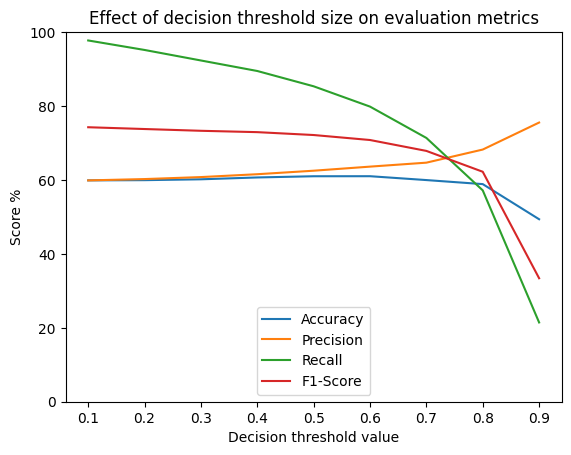

In [12]:
mini_df = test_thresh_size(gold_mini, preds_mini)
visualise(mini_df)

In [13]:
# examine falsely flagged imgs?